<strong>Loading and cleaning FAO crop yield dataset</strong>

In [7]:
import pandas as pd

# 1. Load your renamed FAO dataset
df = pd.read_csv("FAOSTAT_crop_yield_india.csv")
print("FAO crop yield dataset successfully downloaded!")

FAO crop yield dataset successfully downloaded!


In [8]:
# 2. View structure 
print("Initial shape:", df.shape)
print(df.columns)

Initial shape: (143, 15)
Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description', 'Note'],
      dtype='object')


In [9]:
# 3. Keep only relevant columns
df = df[['Item', 'Year', 'Element', 'Value', 'Unit']]

In [10]:
# 4. Rename columns 
df = df.rename(columns={
    'Item': 'Crop',
    'Value': 'Yield_kg_per_ha'
})

In [11]:
# 5. Convert year to int 
df['Year'] = df['Year'].astype(int)

In [12]:
# 6. Sort by Crop and Year
df = df.sort_values(by=['Crop', 'Year']).reset_index(drop=True)

In [13]:
# 7. View sample of cleaned data
print("\nCleaned Data Preview:")
print(df.head(10))


Cleaned Data Preview:
     Crop  Year Element  Yield_kg_per_ha   Unit
0  Apples  2013   Yield           6137.8  kg/ha
1  Apples  2014   Yield           7978.8  kg/ha
2  Apples  2015   Yield           6689.7  kg/ha
3  Apples  2016   Yield           9101.1  kg/ha
4  Apples  2017   Yield           7426.2  kg/ha
5  Apples  2018   Yield           7730.9  kg/ha
6  Apples  2019   Yield           7519.5  kg/ha
7  Apples  2020   Yield           9077.4  kg/ha
8  Apples  2021   Yield           7271.6  kg/ha
9  Apples  2022   Yield           8219.0  kg/ha


In [14]:
# 8. Save cleaned version for modeling/visualization
df.to_csv("cleaned_crop_yield_india.csv", index=False)

print("\nCleaned dataset saved as 'cleaned_crop_yield_india.csv'")


Cleaned dataset saved as 'cleaned_crop_yield_india.csv'


<br><strong>Extracting and Using Real Weather Data from OpenWeatherMap API.</br></strong>

In [15]:
import requests
import pandas as pd

# Step 1: OpenWeatherMap API Key
API_KEY = '966f257ca42e9f6977a34e3c6b319412'

In [16]:
# Step 2: Set Location (India center)
lat = 20.5937
lon = 78.9629

In [17]:
# Step 3: Construct the API URL
url = (
    f"https://api.openweathermap.org/data/2.5/forecast?"
    f"lat={lat}&lon={lon}&appid={API_KEY}&units=metric"
)

In [18]:
# Step 4: Send Request and Get JSON
response = requests.get(url)
data = response.json()

In [19]:
# Step 5: Extract Relevant Data
weather_data = []
for entry in data['list']:
    dt = entry['dt_txt']
    temp = entry['main']['temp']
    humidity = entry['main']['humidity']
    rain = entry.get('rain', {}).get('3h', 0)  # Safe access if no rain
    
    weather_data.append({
        'DateTime': dt,
        'Temperature_C': temp,
        'Humidity_%': humidity,
        'Rainfall_mm': rain
    })

In [20]:
# Step 6: Create DataFrame
forecast_df = pd.DataFrame(weather_data)
forecast_df.to_csv('forecast_weather_data.csv', index=False) #save the dataframe
forecast_df.head() #to view top 5 rows 

,DateTime,Temperature_C,Humidity_%,Rainfall_mm
0,2025-06-19 09:00:00,34.19,46,0.57
1,2025-06-19 12:00:00,33.78,47,0.78
2,2025-06-19 15:00:00,29.31,68,5.65
3,2025-06-19 18:00:00,26.72,61,3.64
4,2025-06-19 21:00:00,27.28,65,0.10


<br><strong>Add Satellite Imagery via NDVI Features: Using Google Earth Engine (GEE)</br></strong>

In [22]:
#Install Required Packages
!pip install earthengine-api
!pip install geemap

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/13.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.6 MB ? eta -:--:--
    --------------------------------------- 0.3/13.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/13.6 MB 837.5 kB/s eta 0:00:16
   - -------------------------------------- 0.5/13.6 MB 837.5 kB/s eta 0:00:16
   -- ------------------------------------- 0.8/13.6 MB 780.2 kB/s eta 0:00:17
   -- ------------------------------------- 0.8/13.6 MB 780.2 kB/s eta 0:00:17
   --- ------------------------------------ 1.0/13.6 MB 645.1 kB/s eta 0:00:20
   ---- ----------------------------------- 1.6/13.6 MB 873.8 kB/s eta 0:00:14
   ----- ---------------------------------- 1.8/13.6 MB 958.5 kB/s eta 0:00:13
   ------ --------------------------------- 2.4/13.6 MB 1.1 MB/s eta 0:00:11
   ------ --------------------------------- 2.4/13.6 MB 1.1 MB/s eta 0:00:11
   --

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.3 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.3 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.3 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.3 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.3 MB 294.2 kB/s eta 0:00:06
   --------- ------------------------------ 0.5/2.3 MB 294.2 kB/s eta 0:00:06
   ------------- --------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
!pip install earthengine-api --upgrade

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
#Authenticate GEE
import ee

# Initialize Earth Engine
ee.Authenticate()
ee.Initialize()

Enter verification code:  4/1AVMBsJj07SQXeTVw0tpVSmbdCFK8Y_2_vSp0CLuTYcPLwTOlU6Qqjw0ifBc



Successfully saved authorization token.


In [30]:
# Step 1: Import libraries
import ee

# Step 2: Initialize Earth Engine (token already saved earlier)
ee.Initialize()

print("Earth Engine Initialized")

Earth Engine Initialized


In [31]:
# Step 3: Define India as AOI from GAUL (FAO Global Admin dataset)
countries = ee.FeatureCollection("FAO/GAUL/2015/level0")
india = countries.filter(ee.Filter.eq('ADM0_NAME', 'India'))

print("India selected as area of interest")

India selected as area of interest


In [32]:
# Step 4: Load Sentinel-2 data, filter by date and cloud cover
sentinel = ee.ImageCollection("COPERNICUS/S2_SR") \
    .filterBounds(india) \
    .filterDate('2023-11-01', '2023-11-30') \
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 10)) \
    .median()

print("Sentinel-2 ImageCollection loaded")

Sentinel-2 ImageCollection loaded


C:\Users\thris\AppData\Roaming\Python\Python312\site-packages\ee\deprecation.py:207: DeprecationWarning: 

Attention required for COPERNICUS/S2_SR! You are using a deprecated asset.
To make sure your code keeps working, please update it.
Learn more: https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2_SR

  warnings.warn(warning, category=DeprecationWarning)


In [33]:
# Step 5: NDVI = (NIR - RED) / (NIR + RED)
ndvi = sentinel.normalizedDifference(['B8', 'B4']).rename('NDVI')
ndvi_clipped = ndvi.clip(india)

print("NDVI calculated and clipped to India")

NDVI calculated and clipped to India


In [36]:
#Step 6: Calculate India’s Mean NDVI directly
mean_dict = ndvi_clipped.reduceRegion(
    reducer=ee.Reducer.mean(),
    geometry=india.geometry(),
    scale=500,
    maxPixels=1e13
)

# Extract the mean value
mean_ndvi = mean_dict.get("NDVI").getInfo()
print(f"Mean NDVI for India in Nov 2023: {mean_ndvi:.4f}")

Mean NDVI for India in Nov 2023: 0.2775


In [37]:
#step 7: Add NDVI value for the cleaned_crop_yield_india.csv dataset
import pandas as pd

df_yield = pd.read_csv("cleaned_crop_yield_india.csv")
df_yield["NDVI_mean"] = mean_ndvi
df_yield.to_csv("cleaned_crop_yield_india_with_ndvi.csv", index=False)
print("NDVI added to crop yield data")

NDVI added to crop yield data


In [38]:
#step 8: Add NDVI value for the forecast_weather_data.csv dataset
df_weather = pd.read_csv("forecast_weather_data.csv")
df_weather["NDVI_mean"] = mean_ndvi
df_weather.to_csv("forecast_weather_data_with_ndvi.csv", index=False)
print("NDVI added to forecast weather data")

NDVI added to forecast weather data


In [39]:
import pandas as pd

# Step 1: Load the cleaned FAO yield dataset
df_yield = pd.read_csv("cleaned_crop_yield_india.csv")

# Step 2: Load your forecast weather data
df_weather = pd.read_csv("forecast_weather_data.csv")

# Step 3: Reset index for clean concat (optional but safe)
df_yield = df_yield.reset_index(drop=True)
df_weather = df_weather.reset_index(drop=True)

# Step 4: Concatenate horizontally (side by side)
df_combined = pd.concat([df_yield, df_weather], axis=1)

# Step 5: Add NDVI value only once (to all rows as it's same for whole region)
ndvi_value = 0.2775  # replace with your computed value if stored in a variable
df_combined["NDVI_mean"] = ndvi_value

# Step 6: Save to CSV
df_combined.to_csv("final_combined_dataset.csv", index=False)

print("Final dataset saved as 'final_combined_dataset.csv'")

Final dataset saved as 'final_combined_dataset.csv'


<strong> MODEL DESIGN – Feedforward Neural Net (Fusion model)</strong>

In [40]:
#Step 1: Import & Load Data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns

# Load your final merged dataset
df = pd.read_csv("final_combined_dataset.csv")

# Show sample
df.head()

,Crop,Year,Element,Yield_kg_per_ha,Unit,DateTime,Temperature_C,Humidity_%,Rainfall_mm,NDVI_mean
0,Apples,2013,Yield,6137.8,kg/ha,2025-06-19 09:00:00,34.19,46.0,0.57,0.2775
1,Apples,2014,Yield,7978.8,kg/ha,2025-06-19 12:00:00,33.78,47.0,0.78,0.2775
2,Apples,2015,Yield,6689.7,kg/ha,2025-06-19 15:00:00,29.31,68.0,5.65,0.2775
3,Apples,2016,Yield,9101.1,kg/ha,2025-06-19 18:00:00,26.72,61.0,3.64,0.2775
4,Apples,2017,Yield,7426.2,kg/ha,2025-06-19 21:00:00,27.28,65.0,0.10,0.2775


In [43]:
#Step 2: Preprocess Data
# Encode categorical 'Crop'
le_crop = LabelEncoder()
df['Crop_encoded'] = le_crop.fit_transform(df['Crop'])

# Select features and label
X = df[['Crop_encoded', 'Year', 'NDVI_mean']]
y = df['Yield_kg_per_ha']

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [44]:
#Step 3: Build the Neural Network (TensorFlow)
# Simple feedforward regression model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression
])

# Compile
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)

C:\Users\thris\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - loss: 549960640.0000 - mae: 13889.3281 - val_loss: 343235200.0000 - val_mae: 9354.4678
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 419138368.0000 - mae: 12361.1758 - val_loss: 343233824.0000 - val_mae: 9354.3965
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 454916512.0000 - mae: 12745.4375 - val_loss: 343232352.0000 - val_mae: 9354.3242
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 521713024.0000 - mae: 13720.9033 - val_loss: 343230816.0000 - val_mae: 9354.2490
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 452752448.0000 - mae: 12997.8594 - val_loss: 343229248.0000 - val_mae: 9354.1689
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 447131648.0000 - mae: 12996.1240 - val_loss: 343227488.0000 - val_mae: 9354.0801
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 408659968.0000 - mae: 12238.7207 - val_loss: 343225568.0000 - val_mae: 9353.9854
Epoch 8/100
3/3 ━━━━━━━━━━

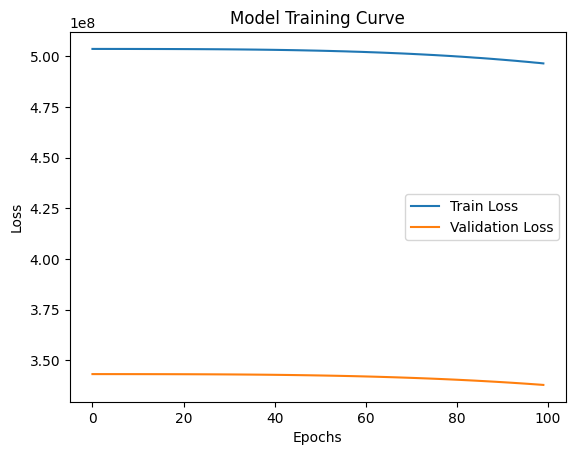

In [45]:
#Step 4: Plot Training Results
# Plot training loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Training Curve')
plt.show()

In [46]:
#Step 5: Evaluate on Test Set
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae:.2f} kg/ha")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 880698880.0000 - mae: 16340.3232
Test MAE: 16340.32 kg/ha


In [48]:
#Step 6: Save Model for Streamlit App
model.save("crop_yield_model.h5")

In [51]:
import pandas as pd
import numpy as np

# Step 1: Load the dataset
df = pd.read_csv("final_combined_dataset.csv")

# Step 2: Add realistic NDVI noise around 0.2775
# We'll use a small normal distribution centered around 0.2775 ± 0.015
np.random.seed(42)  # For reproducibility
df['NDVI_mean'] = np.round(np.random.normal(loc=0.2775, scale=0.01, size=len(df)), 4)

# Step 3: Optional - Clip values to stay in realistic NDVI range [0.1, 0.9]
df['NDVI_mean'] = df['NDVI_mean'].clip(lower=0.1, upper=0.9)

# Step 4: Save it back
import os
print(os.path.abspath("final_combined_dataset.csv"))

# Preview
df.head()

C:\Users\thris\Documents\Thrisha Python\DL_Hack\final_combined_dataset.csv


,Crop,Year,Element,Yield_kg_per_ha,Unit,DateTime,Temperature_C,Humidity_%,Rainfall_mm,NDVI_mean
0,Apples,2013,Yield,6137.8,kg/ha,2025-06-19 09:00:00,34.19,46.0,0.57,0.2825
1,Apples,2014,Yield,7978.8,kg/ha,2025-06-19 12:00:00,33.78,47.0,0.78,0.2761
2,Apples,2015,Yield,6689.7,kg/ha,2025-06-19 15:00:00,29.31,68.0,5.65,0.2840
3,Apples,2016,Yield,9101.1,kg/ha,2025-06-19 18:00:00,26.72,61.0,3.64,0.2927
4,Apples,2017,Yield,7426.2,kg/ha,2025-06-19 21:00:00,27.28,65.0,0.10,0.2752
